In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-07-18/detectors.csv')

In [107]:
data.head()

,kind,.pred_AI,.pred_class,detector,native,name,model,document_id,prompt
0,Human,0.999994,AI,Sapling,No,Real TOEFL,Human,497,NaN
1,Human,0.828145,AI,Crossplag,No,Real TOEFL,Human,278,NaN
2,Human,0.000214,Human,Crossplag,Yes,Real College Essays,Human,294,NaN
3,AI,0.000000,Human,ZeroGPT,NaN,Fake CS224N - GPT3,GPT3,671,Plain
4,AI,0.001784,Human,OriginalityAI,NaN,"Fake CS224N - GPT3, PE",GPT4,717,Elevate using technical


In [102]:
not_native_speaker_crossplag = data.loc[(data['native'] == 'No') & (data['detector']=='Crossplag')]
print(len(not_native_speaker_crossplag))
not_native_speaker_crossplag.head()

91


,kind,.pred_AI,.pred_class,detector,native,name,model,document_id,prompt
1,Human,0.828145,AI,Crossplag,No,Real TOEFL,Human,278,NaN
59,Human,0.169786,Human,Crossplag,No,Real TOEFL,Human,264,NaN
128,Human,0.019563,Human,Crossplag,No,Real TOEFL,Human,460,NaN
150,Human,0.020909,Human,Crossplag,No,Real TOEFL,Human,322,NaN
331,Human,0.975465,AI,Crossplag,No,Real TOEFL,Human,525,NaN


In [53]:
not_native_speaker_crossplag = not_native_speaker_crossplag.drop(['.pred_class','native','name','model','document_id','prompt'], axis=1)

In [54]:
not_native_speaker_crossplag.head()

,kind,.pred_AI,detector
1,Human,0.828145,Crossplag
59,Human,0.169786,Crossplag
128,Human,0.019563,Crossplag
150,Human,0.020909,Crossplag
331,Human,0.975465,Crossplag


Text(0.5, 1.0, 'Crossplag')

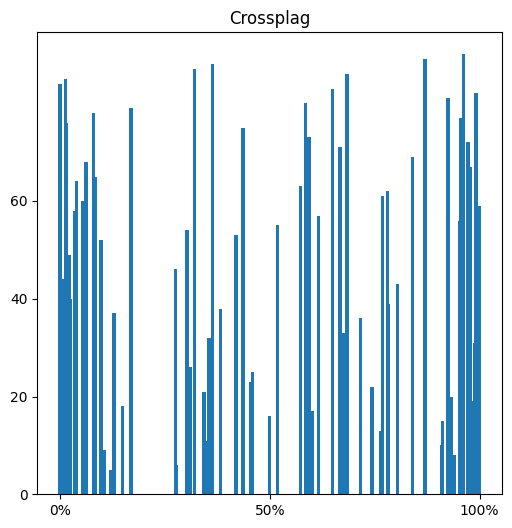

In [105]:
f, ax = plt.subplots(figsize=(6,6), )

xticks,yticks = [0,50,100],[0,20,40,60]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

xticks_labels = [str(t)+'%' for t in xticks]
ax.set_xticklabels(xticks_labels);

ax.bar(not_native_speaker_crossplag['.pred_AI']*100,range(len(not_native_speaker_crossplag)))
ax.set_title('Crossplag')

([0, 100, 200, 300], [0, 50, 100])

# Dynamic

In [122]:
detectors = list(data['detector'].unique())

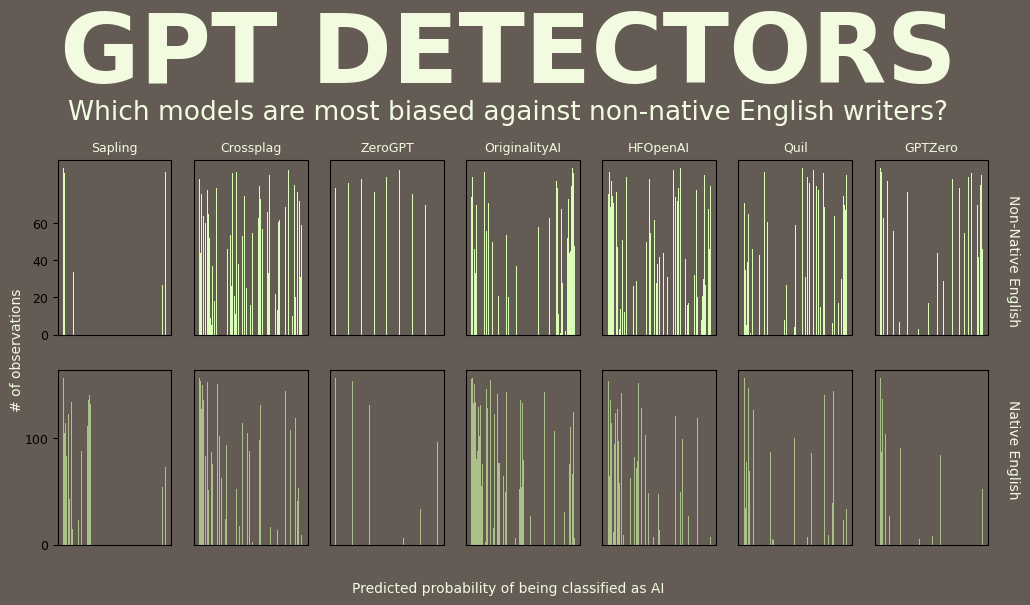

In [251]:
titlefp = FontProperties(family="sans-serif", size=70, weight="bold")
subtitlefp = FontProperties(family="sans-serif", size=19)

plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

plt.rcParams.update({'text.color': "#f2fbe0",
                     'axes.labelcolor': "#f2fbe0"})

f, axs = plt.subplots(2,len(detectors),figsize=(12, 5),facecolor='#645c54')

xticks,yticks0,yticks1 = [0,50,100],[0,20,40,60],[0,100,200,300]

f.suptitle('GPT DETECTORS',y=1.18,fontproperties=titlefp)
f.text(0.5,1,'Which models are most biased against non-native English writers?',horizontalalignment='center',verticalalignment='top',fontproperties=subtitlefp)
f.text(0.5, 0.015, 'Predicted probability of being classified as AI', horizontalalignment='center')
f.text(0.915, 0.81, 'Non-Native English', verticalalignment='top', rotation=-90)
f.text(0.915, 0.4, 'Native English', verticalalignment='top', rotation=-90)
f.text(0.085, 0.5, '# of observations', va='center', rotation='vertical')

axs[0,0].set_yticks(yticks0)
axs[1,0].set_yticks(yticks1) #scale 0-300 not working
 
xticks_labels = [str(t)+'%' for t in xticks]

def create_subplots(data,native,barcolor):
    axs[native,fig_index].bar(data['.pred_AI']*100,range(len(data)),color=barcolor)
    axs[0,fig_index].set_title(detector,fontsize=9)
    axs[native,fig_index].set_xticks([])
    axs[native,fig_index].set_facecolor('#645c54')
    
    #set empty ytick on every other detector besides the first one  
    if fig_index != 0:
        axs[native,fig_index].set_yticks([])

for detector in detectors:
    fig_index = detectors.index(detector)
    
    #row 0
    x = data.loc[(data['native'] == 'No') & (data['detector']==detector)]
    
    create_subplots(x,0,'#dafeb7')
    
    #row 1
    x1 = data.loc[(data['native'] == 'Yes') & (data['detector']==detector)]
    
    create_subplots(x1,1,'#acc18a')
    